In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as ssn
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
import joblib

In [22]:
df_warnings = pd.read_csv(r'C:\Users\REPO\Tec2025\HackForHer\Datasets_Entrenamiento\fallas_sin_feb.csv')
df_nowarnings = pd.read_csv(r'C:\Users\REPO\Tec2025\HackForHer\Datasets_Entrenamiento\sinwarnings_sinfeb.csv')

#df_nowarnings = pd.read_csv(r'C:\Users\REPO\Tec2025\HackForHer\nowarning_complete.csv')

df_warnings = df_warnings.drop(columns=['Unnamed: 0'], errors='ignore')  # elimina si existe
df_warnings_positivos = df_warnings[df_warnings['Target'] == 1].copy()

In [23]:
df_unidos = pd.concat(
    [df_warnings, df_nowarnings],
    axis=0,  # vertical
    ignore_index=True
)
df_unidos.drop(columns=['cooler_id'], errors='ignore')

,door_opens,open_time,compressor,power,on_time,min_voltage,max_voltage,temperature,calday,warning,year,month,Target,Motive
0,34.0,1.0,46.1020,2.8333,24.0,110.0,130.0,4.8163,NaN,1,2024.0,3.0,0,temperature
1,27.0,13.0,40.4286,0.0000,24.0,110.0,130.0,5.4878,NaN,1,2024.0,3.0,0,temperature
2,27.0,1.0,31.3061,1.0833,24.0,108.0,130.0,5.0571,NaN,1,2024.0,3.0,0,temperature
3,51.0,37.0,32.0200,3.1667,24.0,110.0,124.0,5.0300,NaN,1,2024.0,3.0,0,temperature
4,51.0,4.0,28.6000,3.2500,24.0,106.0,130.0,3.8940,NaN,1,2024.0,3.0,0,temperature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,2.0,0.0,19.3333,0.0000,9.0,102.0,130.0,5.8944,12/28/2024,0,NaN,NaN,0,NaN
5798,NaN,0.0,NaN,NaN,24.0,NaN,NaN,NaN,11/6/2024,0,NaN,NaN,0,NaN
5799,115.0,14.0,34.8542,0.0000,24.0,102.0,132.0,5.1583,4/20/2025,0,NaN,NaN,0,NaN
5800,123.0,14.0,48.6458,0.0000,24.0,98.0,132.0,3.7500,4/19/2025,0,NaN,NaN,0,NaN


In [24]:
X = df_unidos.drop(columns='Target')
y = df_unidos['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42 )

In [25]:
# Proporciones por clases
print("\nProporción en y_train:")
print(y_train.value_counts(normalize=True))

print("\nProporción en y_test:")
print(y_test.value_counts(normalize=True))



Proporción en y_train:
Target
0    0.78158
1    0.21842
Name: proportion, dtype: float64

Proporción en y_test:
Target
0    0.778068
1    0.221932
Name: proportion, dtype: float64


In [26]:
X_train = X_train.drop(columns=X_train.select_dtypes(include='object').columns, errors='ignore').copy()
X_test = X_test.drop(columns=X_test.select_dtypes(include='object').columns, errors='ignore').copy()


In [27]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
'''pred_train = model.predict(X_train)'''
prob = model.predict_proba(X_test)[:, 1]

In [28]:
print(prob)

[0.         0.05       0.         ... 0.86633333 0.165      0.        ]


In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
print(cm)

[[1393   97]
 [ 122  303]]


In [30]:
'''cm_train = confusion_matrix(y_train, pred_train)
print(cm_train)'''

'cm_train = confusion_matrix(y_train, pred_train)\nprint(cm_train)'

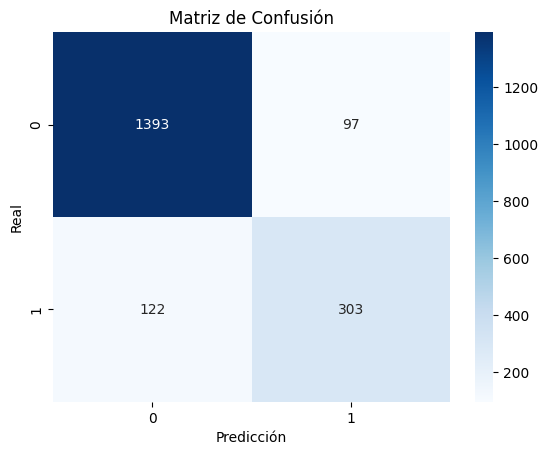

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1490
           1       0.76      0.71      0.73       425

    accuracy                           0.89      1915
   macro avg       0.84      0.82      0.83      1915
weighted avg       0.88      0.89      0.88      1915



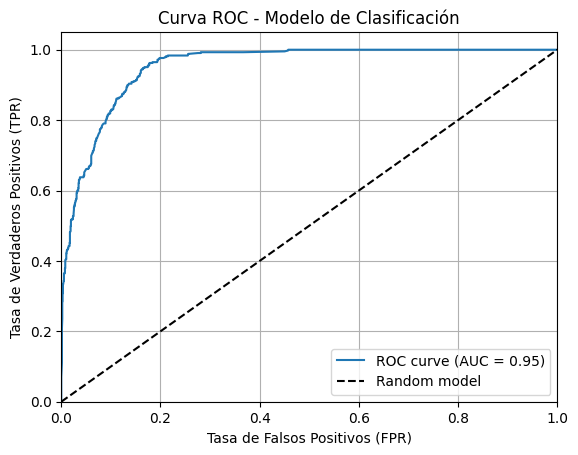

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)

# Gráfico
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo de Clasificación')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [34]:
'''fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_train)
roc_auc_train = auc(fpr_train, tpr_train)
# Gráfico
plt.figure()
plt.plot(fpr_train, tpr_train, label=f'ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random model')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo de Clasificación')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
'''

'fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_train)\nroc_auc_train = auc(fpr_train, tpr_train)\n# Gráfico\nplt.figure()\nplt.plot(fpr_train, tpr_train, label=f\'ROC curve (AUC = {roc_auc_train:.2f})\')\nplt.plot([0, 1], [0, 1], \'k--\', label=\'Random model\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'Tasa de Falsos Positivos (FPR)\')\nplt.ylabel(\'Tasa de Verdaderos Positivos (TPR)\')\nplt.title(\'Curva ROC - Modelo de Clasificación\')\nplt.legend(loc="lower right")\nplt.grid(True)\nplt.show()\n'

In [35]:
# Usamos AUC como métrica
X = X.drop(columns=X.select_dtypes(include='object').columns, errors='ignore').copy()
auc_scores = cross_val_score(model, X, y, 
                             cv=10, 
                             scoring='roc_auc')  # usa 'accuracy', 'recall', etc. si prefieres otra métrica

print(f"AUC promedio: {auc_scores.mean():.3f}")
print(f"AUC por fold: {auc_scores}")

AUC promedio: 0.922
AUC por fold: [0.95558257 0.77147144 0.93127184 0.94204863 0.83712259 0.97617806
 0.95472006 0.99974796 0.94334209 0.91306865]


In [36]:
joblib.dump(model, 'modelo_sinimputar.pkl')  # Puedes cambiar el nombre del archivo

['modelo_sinimputar.pkl']